In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [68]:
df= pd.read_csv(r'C:\Users\am12759\OneDrive - Methode Electronics\Machine Learning\RealEstate Project\archive\Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [69]:
df.shape

(13320, 9)

In [70]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [71]:
df.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [72]:
df1 = df.drop(columns= ['society', 'availability'])

In [73]:
df2= df1.dropna(subset= ['area_type', 'location', 'size', 'total_sqft', 'bath', 'price'])
df2.shape

(13246, 7)

In [74]:
df2.isnull().sum()

area_type       0
location        0
size            0
total_sqft      0
bath            0
balcony       536
price           0
dtype: int64

In [75]:
df2['bhk']= drop_na['size'].apply(lambda x : int(x.split(' ')[0]))
df2.head()

C:\Users\am12759\AppData\Local\Temp\ipykernel_1772\1832148449.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk']= drop_na['size'].apply(lambda x : int(x.split(' ')[0]))


,area_type,location,size,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [76]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13246 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   13246 non-null  object 
 1   location    13246 non-null  object 
 2   size        13246 non-null  object 
 3   total_sqft  13246 non-null  object 
 4   bath        13246 non-null  float64
 5   balcony     12710 non-null  float64
 6   price       13246 non-null  float64
 7   bhk         13246 non-null  int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 931.4+ KB


In [77]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [78]:
df2[~df2['total_sqft'].apply(is_float)]

,area_type,location,size,total_sqft,bath,balcony,price,bhk
30,Super built-up Area,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
122,Super built-up Area,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,Super built-up Area,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
165,Super built-up Area,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
188,Super built-up Area,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2
...,...,...,...,...,...,...,...,...
12975,Super built-up Area,Whitefield,2 BHK,850 - 1060,2.0,0.0,38.190,2
12990,Super built-up Area,Talaghattapura,3 BHK,1804 - 2273,3.0,0.0,122.000,3
13059,Super built-up Area,Harlur,2 BHK,1200 - 1470,2.0,0.0,72.760,2
13265,Super built-up Area,Hoodi,2 BHK,1133 - 1384,2.0,0.0,59.135,2


In [79]:
def convert_to_float(x):
    y = x.split (' - ')
    if (len(y) == 2):
        return (float(y[0])+ float(y[1]))/2.0
    try: 
        return float(x)
    except: 
        return x

In [80]:
df3= df2.copy()

In [81]:
df3['total_sqft']= df3['total_sqft'].apply(convert_to_float)
df3.head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2


In [82]:
df3['total_sqft']. unique()

array([1056.0, 2600.0, 1440.0, ..., 1258.5, 774.0, 4689.0], dtype=object)

In [83]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13246 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   13246 non-null  object 
 1   location    13246 non-null  object 
 2   size        13246 non-null  object 
 3   total_sqft  13246 non-null  object 
 4   bath        13246 non-null  float64
 5   balcony     12710 non-null  float64
 6   price       13246 non-null  float64
 7   bhk         13246 non-null  int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 931.4+ KB


In [84]:
ind= df3[~df3['total_sqft'].apply(is_float)].index
len(ind)

46

In [85]:
df4 = df3.drop(index= ind)

In [86]:
df4['total_sqft'] = df4['total_sqft'].astype(float)

In [87]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13200 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   13200 non-null  object 
 1   location    13200 non-null  object 
 2   size        13200 non-null  object 
 3   total_sqft  13200 non-null  float64
 4   bath        13200 non-null  float64
 5   balcony     12668 non-null  float64
 6   price       13200 non-null  float64
 7   bhk         13200 non-null  int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 928.1+ KB


In [88]:
df5= df4.copy()

In [89]:
df5['price_per_Sqft']= df5['price']*100000/df5['total_sqft']
df5.head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_Sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [90]:
df5['locationdf5']= df5['location'].apply(lambda x : x.strip())

In [91]:
locations = df5.groupby('location')['location'].count().sort_values(ascending= False)
locations

location
Whitefield             532
Sarjapur  Road         392
Electronic City        302
Kanakpura Road         264
Thanisandra            232
                      ... 
 Banaswadi               1
Kanakadasa Layout        1
Kanakapur main road      1
Kanakapura  Rod          1
whitefiled               1
Name: location, Length: 1298, dtype: int64

In [92]:
type(locations)

pandas.core.series.Series

In [93]:
other_Locations = locations[locations<=10]
type(other_Locations)

pandas.core.series.Series

In [94]:
df5['location'] = df5['location'].apply(lambda x : 'other' if x in other_Locations.index else x)

In [95]:
df6 =df5.copy()

In [96]:
df6['total_sqmt']= df6['total_sqft'] * 0.092903

In [97]:
df6.head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_Sqft,locationdf5,total_sqmt
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606,Electronic City Phase II,98.105568
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615,Chikka Tirupathi,241.547800
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556,Uttarahalli,133.780320
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861,Lingadheeranahalli,141.305463
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000,Kothanur,111.483600


In [98]:
df6['price_per_Sqmt'] = df6['price']*100000/df6['total_sqmt']
df6.head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_Sqft,locationdf5,total_sqmt,price_per_Sqmt
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606,Electronic City Phase II,98.105568,39824.447069
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615,Chikka Tirupathi,241.547800,49679.607929
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556,Uttarahalli,133.780320,46344.634248
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861,Lingadheeranahalli,141.305463,67230.238650
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000,Kothanur,111.483600,45746.638968


In [99]:
df6.describe()

,total_sqft,bath,balcony,price,bhk,price_per_Sqft,total_sqmt,price_per_Sqmt
count,13200.000000,13200.000000,12668.000000,13200.000000,13200.000000,1.320000e+04,13200.000000,1.320000e+04
mean,1555.302783,2.691136,1.585649,112.276178,2.800833,7.920759e+03,144.492294,8.525838e+04
std,1237.323445,1.338915,0.816758,149.175995,1.292843,1.067272e+05,114.951060,1.148802e+06
min,1.000000,1.000000,0.000000,8.000000,1.000000,2.678298e+02,0.092903,2.882897e+03
25%,1100.000000,2.000000,1.000000,50.000000,2.000000,4.267701e+03,102.193300,4.593717e+04
50%,1275.000000,2.000000,2.000000,71.850000,3.000000,5.438331e+03,118.451325,5.853774e+04
75%,1672.000000,3.000000,2.000000,120.000000,3.000000,7.317073e+03,155.333816,7.876035e+04
max,52272.000000,40.000000,3.000000,3600.000000,43.000000,1.200000e+07,4856.225616,1.291670e+08


In [100]:
df7= df6.copy()

In [101]:
df7= df7[df7['total_sqmt']>=60]

In [102]:
df7.head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_Sqft,locationdf5,total_sqmt,price_per_Sqmt
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606,Electronic City Phase II,98.105568,39824.447069
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615,Chikka Tirupathi,241.547800,49679.607929
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556,Uttarahalli,133.780320,46344.634248
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861,Lingadheeranahalli,141.305463,67230.238650
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000,Kothanur,111.483600,45746.638968


In [103]:
df7 = df7[ (df7['total_sqmt']/df7['bhk']) >=35]

(array([9.755e+03, 1.459e+03, 2.510e+02, 5.000e+01, 1.500e+01, 1.000e+00,
        5.000e+00, 2.000e+00, 0.000e+00, 2.000e+00]),
 array([  2882.89735837,  85393.95417009, 167905.01098181, 250416.06779353,
        332927.12460525, 415438.18141697, 497949.23822869, 580460.29504041,
        662971.35185213, 745482.40866385, 827993.46547557]),
 <BarContainer object of 10 artists>)

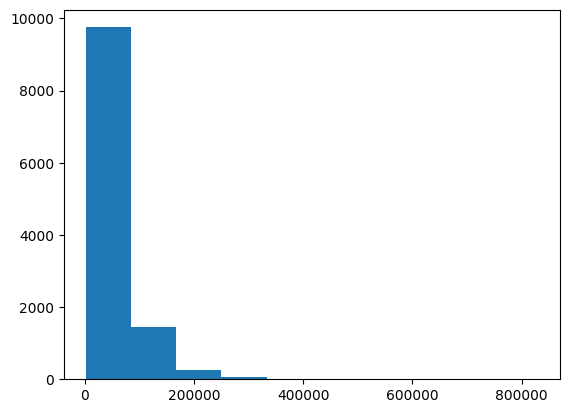

In [104]:
plt.hist(df7['price_per_Sqmt'])

(array([1., 0., 0., 2., 7., 4., 6., 2., 0., 1.]),
 array([49503.0504984 , 53506.68547925, 57510.3204601 , 61513.95544095,
        65517.59042181, 69521.22540266, 73524.86038351, 77528.49536437,
        81532.13034522, 85535.76532607, 89539.40030692]),
 <BarContainer object of 10 artists>)

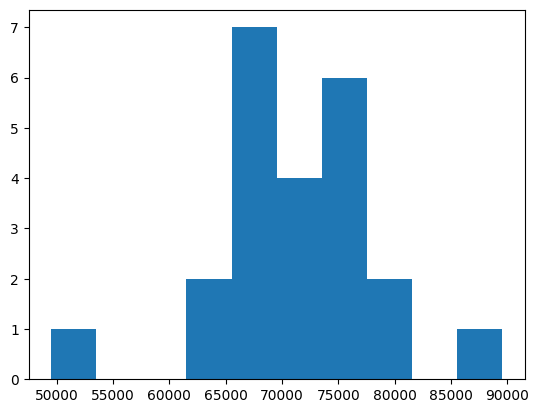

In [105]:
plt.hist(df7[df7['location']== 'Lingadheeranahalli']['price_per_Sqmt'])

In [106]:
def remove_ppsmt_outliers(df):
  df_out = pd.DataFrame()
  for key, subdf in df.groupby('location'):
    mean = subdf['price_per_Sqmt'].mean()
    standard_deviation = subdf['price_per_Sqmt'].std()
    df_out = pd.concat([df_out, subdf[(subdf['price_per_Sqmt']>= mean-standard_deviation) & (subdf['price_per_Sqmt'] <= mean+standard_deviation)]], ignore_index=True)
  return df_out
df8= remove_ppsmt_outliers(df7)
df8.head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_Sqft,locationdf5,total_sqmt,price_per_Sqmt
0,Super built-up Area,Devarachikkanahalli,3 BHK,1250.0,2.0,3.0,44.0,3,3520.000000,Devarachikkanahalli,116.128750,37888.980980
1,Super built-up Area,Devarachikkanahalli,2 BHK,1250.0,2.0,2.0,40.0,2,3200.000000,Devarachikkanahalli,116.128750,34444.528164
2,Plot Area,Devarachikkanahalli,2 Bedroom,1200.0,2.0,2.0,83.0,2,6916.666667,Devarachikkanahalli,111.483600,74450.412437
3,Super built-up Area,Devarachikkanahalli,2 BHK,1170.0,2.0,2.0,40.0,2,3418.803419,Devarachikkanahalli,108.696510,36799.709577
4,Super built-up Area,Devarachikkanahalli,3 BHK,1425.0,2.0,2.0,65.0,3,4561.403509,Devarachikkanahalli,132.386775,49098.559883


In [107]:
len(df8)

9348

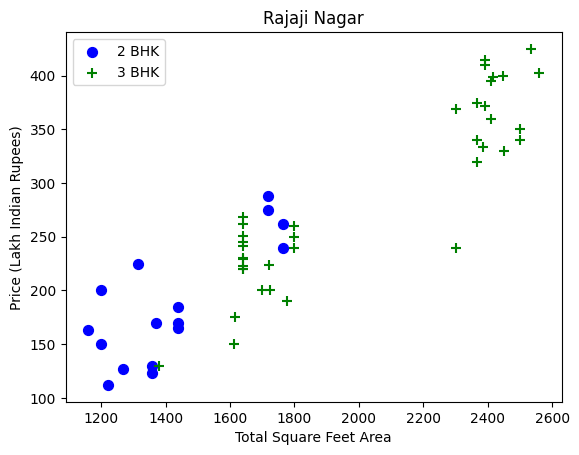

In [108]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]

    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df8,"Rajaji Nagar")

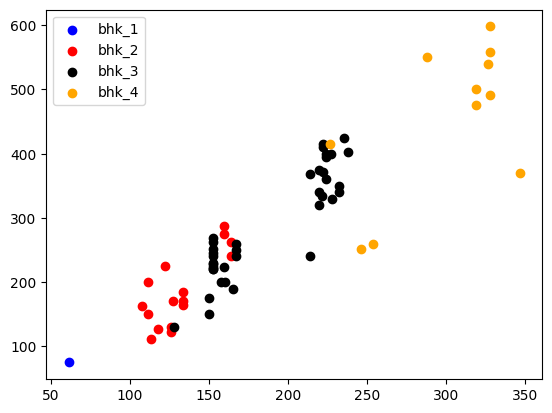

In [109]:
def scatter_chart (df, location):
    df_1 = df[(df['location'] == location) & (df.bhk ==1)]
    df_2 = df[(df['location'] == location) & (df.bhk ==2)]
    df_3 = df[(df['location'] == location) & (df.bhk ==3)]
    df_4 = df[(df['location'] == location) & (df.bhk ==4)]
    plt.scatter(df_1['total_sqmt'], df_1 ['price'], color= 'blue', label= 'bhk_1')
    plt.scatter(df_2['total_sqmt'], df_2 ['price'], color= 'red', label= 'bhk_2')
    plt.scatter(df_3['total_sqmt'], df_3 ['price'], color= 'black', label= 'bhk_3')
    plt.scatter(df_4['total_sqmt'], df_4 ['price'], color= 'orange', label= 'bhk_4')
    plt.legend()
scatter_chart(df8,"Rajaji Nagar")

In [110]:
def remove_bhk_outliers(df):
    execlude_indicies = []
    for key, subdf in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in subdf.groupby('bhk'):
            bhk_stats[bhk]= {
                'mean': bhk_df['price_per_Sqmt'].mean(),
                'std': bhk_df['price_per_Sqmt'].std(),
                'count' : bhk_df.count()
            }
        for bhk, bhk_df in subdf.groupby('bhk'):
            stats= bhk_stats.get(bhk-1)
            if stats:
                execlude_indicies.extend (bhk_df[bhk_df['price_per_Sqmt'] <= stats['mean']].index)
    return execlude_indicies
indicies = remove_bhk_outliers(df8)
indicies

[0,
 12,
 14,
 16,
 23,
 20,
 36,
 38,
 40,
 41,
 43,
 59,
 66,
 67,
 68,
 77,
 100,
 105,
 125,
 129,
 132,
 133,
 136,
 137,
 140,
 146,
 147,
 156,
 174,
 178,
 179,
 110,
 117,
 118,
 124,
 127,
 143,
 165,
 176,
 180,
 108,
 183,
 185,
 193,
 207,
 209,
 216,
 217,
 219,
 221,
 223,
 239,
 241,
 242,
 252,
 258,
 276,
 289,
 296,
 302,
 319,
 323,
 331,
 332,
 322,
 326,
 325,
 327,
 339,
 342,
 344,
 352,
 354,
 357,
 361,
 369,
 370,
 371,
 384,
 392,
 400,
 414,
 446,
 440,
 448,
 457,
 459,
 464,
 466,
 468,
 469,
 470,
 461,
 478,
 483,
 481,
 482,
 498,
 501,
 505,
 506,
 512,
 527,
 531,
 537,
 540,
 541,
 543,
 547,
 550,
 556,
 561,
 563,
 564,
 566,
 567,
 568,
 569,
 574,
 575,
 579,
 584,
 589,
 590,
 591,
 592,
 601,
 605,
 609,
 611,
 614,
 615,
 619,
 622,
 623,
 624,
 626,
 627,
 628,
 629,
 630,
 633,
 634,
 636,
 637,
 638,
 639,
 640,
 643,
 644,
 645,
 648,
 651,
 653,
 659,
 660,
 661,
 604,
 610,
 618,
 632,
 646,
 656,
 657,
 662,
 616,
 665,
 667,
 673,
 67

In [111]:
df9 = df8.drop(index= indicies)
df9.shape

(5882, 12)

In [112]:
df10 = df9[~(df9['bath']> df9['bhk'])]

In [113]:
df10.shape

(5506, 12)

In [114]:
df10.head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_Sqft,locationdf5,total_sqmt,price_per_Sqmt
1,Super built-up Area,Devarachikkanahalli,2 BHK,1250.0,2.0,2.0,40.0,2,3200.000000,Devarachikkanahalli,116.128750,34444.528164
2,Plot Area,Devarachikkanahalli,2 Bedroom,1200.0,2.0,2.0,83.0,2,6916.666667,Devarachikkanahalli,111.483600,74450.412437
3,Super built-up Area,Devarachikkanahalli,2 BHK,1170.0,2.0,2.0,40.0,2,3418.803419,Devarachikkanahalli,108.696510,36799.709577
4,Super built-up Area,Devarachikkanahalli,3 BHK,1425.0,2.0,2.0,65.0,3,4561.403509,Devarachikkanahalli,132.386775,49098.559883
5,Super built-up Area,Devarachikkanahalli,2 BHK,947.0,2.0,2.0,43.0,2,4540.654699,Devarachikkanahalli,87.979141,48875.221457


In [115]:
df11 = df10.drop(columns= ['area_type', 'total_sqft', 'size', 'price_per_Sqft', 'locationdf5', 'price_per_Sqmt'])
df11.head()

,location,bath,balcony,price,bhk,total_sqmt
1,Devarachikkanahalli,2.0,2.0,40.0,2,116.128750
2,Devarachikkanahalli,2.0,2.0,83.0,2,111.483600
3,Devarachikkanahalli,2.0,2.0,40.0,2,108.696510
4,Devarachikkanahalli,2.0,2.0,65.0,3,132.386775
5,Devarachikkanahalli,2.0,2.0,43.0,2,87.979141


In [116]:
df11.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5506 entries, 1 to 9344
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    5506 non-null   object 
 1   bath        5506 non-null   float64
 2   balcony     5365 non-null   float64
 3   price       5506 non-null   float64
 4   bhk         5506 non-null   int64  
 5   total_sqmt  5506 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 301.1+ KB


In [117]:
df11['balcony'] = df11['balcony'].fillna(0)
df11.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5506 entries, 1 to 9344
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    5506 non-null   object 
 1   bath        5506 non-null   float64
 2   balcony     5506 non-null   float64
 3   price       5506 non-null   float64
 4   bhk         5506 non-null   int64  
 5   total_sqmt  5506 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 301.1+ KB


In [118]:
dummies = pd.get_dummies(df11['location'])
dummies = dummies.drop(columns= 'other')
dummies.replace({True: 1, False: 0}, inplace= True)
dummies.reset_index(drop= True, inplace= True)
dummies.info()

C:\Users\am12759\AppData\Local\Temp\ipykernel_1772\1648678783.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dummies.replace({True: 1, False: 0}, inplace= True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5506 entries, 0 to 5505
Columns: 240 entries,  Devarachikkanahalli to Yeshwanthpur
dtypes: int64(240)
memory usage: 10.1 MB


In [119]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
df13 = df11.drop(columns= ['location', 'price']) 
df13.reset_index(drop= True, inplace= True)
df14 = pd.concat([df13, dummies], axis= 1)


In [120]:
df14.head()

,bath,balcony,bhk,total_sqmt,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2.0,2.0,2,116.128750,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.0,2.0,2,111.483600,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,2.0,2,108.696510,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2.0,2.0,3,132.386775,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,2.0,2,87.979141,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [121]:
sc_x = StandardScaler()
X_linear = sc_x.fit_transform(df14)
X_linear = pd.DataFrame(X_linear, columns= df14.columns)
X_linear_intercept= X_linear.copy()
X_linear_intercept['Intercept'] = 1
sc_y = StandardScaler()
y_linear = sc_y.fit_transform(df11[['price']])
y_linear = pd.DataFrame(y_linear, columns= ['price'])

In [122]:
X = df14.copy()
y= df11[['price']]

In [123]:
X_linear_intercept.head()

,bath,balcony,bhk,total_sqmt,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,Intercept
0,-0.458047,0.566663,-0.592903,-0.292918,22.350514,-0.030148,-0.048648,-0.023349,-0.019062,-0.026963,...,-0.023349,-0.026963,-0.075247,-0.192631,-0.048648,-0.112654,-0.055652,-0.038145,-0.071494,1
1,-0.458047,0.566663,-0.592903,-0.356284,22.350514,-0.030148,-0.048648,-0.023349,-0.019062,-0.026963,...,-0.023349,-0.026963,-0.075247,-0.192631,-0.048648,-0.112654,-0.055652,-0.038145,-0.071494,1
2,-0.458047,0.566663,-0.592903,-0.394303,22.350514,-0.030148,-0.048648,-0.023349,-0.019062,-0.026963,...,-0.023349,-0.026963,-0.075247,-0.192631,-0.048648,-0.112654,-0.055652,-0.038145,-0.071494,1
3,-0.458047,0.566663,0.621126,-0.071139,22.350514,-0.030148,-0.048648,-0.023349,-0.019062,-0.026963,...,-0.023349,-0.026963,-0.075247,-0.192631,-0.048648,-0.112654,-0.055652,-0.038145,-0.071494,1
4,-0.458047,0.566663,-0.592903,-0.676913,22.350514,-0.030148,-0.048648,-0.023349,-0.019062,-0.026963,...,-0.023349,-0.026963,-0.075247,-0.192631,-0.048648,-0.112654,-0.055652,-0.038145,-0.071494,1


In [124]:
import statsmodels.api as sm
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
def best_features (X_linear):
    selected_features= []
    for i in range (len(X_linear.columns)):
        max_pvalue = 0.05
        variable = ''
        for indep_variable in X_linear.columns[:4]:
            if indep_variable not in selected_features:
                model = sm.OLS( y_linear, X[selected_features + [indep_variable]]).fit()
                pvalue= model.pvalues
                if pvalue[-1] <= max_pvalue:
                    max_pvalue = pvalue[-1]
                    variable = indep_variable
        if variable != '':
            selected_features.append(variable)
    return(selected_features)


In [125]:
from sklearn.linear_model import LinearRegression
cv = ShuffleSplit(n_splits= 5, test_size= 0.2, random_state= 0)
cross_val_score(LinearRegression(), X_linear_intercept[best_features(X_linear_intercept)], y_linear,cv=cv).mean()

C:\Users\am12759\AppData\Local\Temp\ipykernel_1772\3349303936.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if pvalue[-1] <= max_pvalue:
C:\Users\am12759\AppData\Local\Temp\ipykernel_1772\3349303936.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  max_pvalue = pvalue[-1]
C:\Users\am12759\AppData\Local\Temp\ipykernel_1772\3349303936.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if pvalue[-1] <= max_pvalue:
C:\Users\

0.6765150625949401

In [126]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_linear_intercept,y_linear,test_size= 0.2, random_state=0)

In [127]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
linear_pipeline = Pipeline([('PCA', PCA(n_components= 0.9)),('Linear_Regression', LinearRegression())])
linear_pipeline.fit(x_train[best_features(x_train)], y= y_train)

C:\Users\am12759\AppData\Local\Temp\ipykernel_1772\3349303936.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if pvalue[-1] <= max_pvalue:
C:\Users\am12759\AppData\Local\Temp\ipykernel_1772\3349303936.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  max_pvalue = pvalue[-1]
C:\Users\am12759\AppData\Local\Temp\ipykernel_1772\3349303936.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if pvalue[-1] <= max_pvalue:
C:\Users\

Pipeline(steps=[('PCA', PCA(n_components=0.9)),
                ('Linear_Regression', LinearRegression())])

In [128]:
y_predict = linear_pipeline.predict(x_test[best_features(x_test)])

C:\Users\am12759\AppData\Local\Temp\ipykernel_1772\3349303936.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if pvalue[-1] <= max_pvalue:
C:\Users\am12759\AppData\Local\Temp\ipykernel_1772\3349303936.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  max_pvalue = pvalue[-1]
C:\Users\am12759\AppData\Local\Temp\ipykernel_1772\3349303936.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if pvalue[-1] <= max_pvalue:
C:\Users\

In [129]:
from sklearn.metrics import r2_score, mean_squared_error
print(r2_score(y_pred= y_predict, y_true= y_test))


0.6933336902410517


In [130]:
print(mean_squared_error(y_true=y_test, y_pred= y_predict))

0.24187668926244066


In [131]:
X_linear.corr()


,bath,balcony,bhk,total_sqmt,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
bath,1.000000,0.185746,0.910584,0.668780,-0.015349,0.031949,0.001382,-0.000851,0.027434,-0.012350,...,0.004562,0.008993,-0.012350,-0.034467,0.066359,-0.022283,0.012414,-0.033772,-0.011442,-0.026289
balcony,0.185746,1.000000,0.172643,0.109110,0.015377,0.002294,0.000030,0.003686,0.034181,0.023546,...,-0.026749,-0.024950,0.023546,-0.046669,0.000027,0.027567,0.031799,0.007446,0.015768,-0.009591
bhk,0.910584,0.172643,1.000000,0.666105,-0.011714,0.033366,-0.006128,-0.004395,0.046553,-0.007803,...,0.004281,0.014502,-0.015986,-0.044614,0.050796,-0.010671,0.006545,-0.025047,-0.016828,-0.033089
total_sqmt,0.668780,0.109110,0.666105,1.000000,-0.013977,0.028689,0.002097,-0.004561,0.048771,-0.008855,...,-0.007156,0.003024,-0.021652,-0.018528,0.089658,-0.010921,0.007375,-0.019521,-0.010660,-0.024034
Devarachikkanahalli,-0.015349,0.015377,-0.011714,-0.013977,1.000000,-0.001349,-0.002177,-0.001045,-0.000853,-0.001206,...,-0.002960,-0.001045,-0.001206,-0.003367,-0.008619,-0.002177,-0.005040,-0.002490,-0.001707,-0.003199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yelachenahalli,-0.022283,0.027567,-0.010671,-0.010921,-0.002177,-0.001467,-0.002367,-0.001136,-0.000927,-0.001312,...,-0.003219,-0.001136,-0.001312,-0.003661,-0.009371,1.000000,-0.005480,-0.002707,-0.001856,-0.003478
Yelahanka,0.012414,0.031799,0.006545,0.007375,-0.005040,-0.003396,-0.005480,-0.002630,-0.002147,-0.003037,...,-0.007454,-0.002630,-0.003037,-0.008477,-0.021701,-0.005480,1.000000,-0.006269,-0.004297,-0.008054
Yelahanka New Town,-0.033772,0.007446,-0.025047,-0.019521,-0.002490,-0.001678,-0.002707,-0.001299,-0.001061,-0.001501,...,-0.003682,-0.001299,-0.001501,-0.004188,-0.010720,-0.002707,-0.006269,1.000000,-0.002123,-0.003979
Yelenahalli,-0.011442,0.015768,-0.016828,-0.010660,-0.001707,-0.001150,-0.001856,-0.000891,-0.000727,-0.001029,...,-0.002524,-0.000891,-0.001029,-0.002870,-0.007348,-0.001856,-0.004297,-0.002123,1.000000,-0.002727


In [132]:
len(X_linear.columns)

244

In [133]:
from sklearn.decomposition import KernelPCA
linear_pipeline = Pipeline([('K_PCA', KernelPCA(n_components= None, kernel= 'rbf', gamma= 20)),('Linear_Regression', LinearRegression())])
linear_pca = linear_pipeline.fit(X= x_train[best_features(x_train)], y= y_train)

C:\Users\am12759\AppData\Local\Temp\ipykernel_1772\3349303936.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if pvalue[-1] <= max_pvalue:
C:\Users\am12759\AppData\Local\Temp\ipykernel_1772\3349303936.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  max_pvalue = pvalue[-1]
C:\Users\am12759\AppData\Local\Temp\ipykernel_1772\3349303936.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if pvalue[-1] <= max_pvalue:
C:\Users\

In [134]:
y_predict = linear_pipeline.predict(x_test[best_features(x_test)])

C:\Users\am12759\AppData\Local\Temp\ipykernel_1772\3349303936.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if pvalue[-1] <= max_pvalue:
C:\Users\am12759\AppData\Local\Temp\ipykernel_1772\3349303936.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  max_pvalue = pvalue[-1]
C:\Users\am12759\AppData\Local\Temp\ipykernel_1772\3349303936.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if pvalue[-1] <= max_pvalue:
C:\Users\

In [135]:
print(r2_score(y_pred= y_predict, y_true= y_test))

-7077.228806248528


In [136]:
y_predict.shape

(1102, 1)

In [137]:
y.head()

,price
1,40.0
2,83.0
3,40.0
4,65.0
5,43.0


In [138]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso_parameters = {'alpha' : [0.001], 'random_state' : [0]}
lasso_model = GridSearchCV(Lasso(),param_grid= lasso_parameters, cv= cv)
lasso_model.fit(X= X_linear_intercept, y= y_linear)


GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=0, test_size=0.2, train_size=None),
             estimator=Lasso(),
             param_grid={'alpha': [0.001], 'random_state': [0]})

In [139]:
lasso_model.best_score_, lasso_model.best_params_

(0.8514007777806929, {'alpha': 0.001, 'random_state': 0})

In [140]:
from sklearn.ensemble import BaggingRegressor
bag_lasso = BaggingRegressor(estimator= Lasso(alpha= 0.001, random_state= 0), n_estimators= 200, max_samples= 550, oob_score= True, random_state= 0 )

In [141]:
bag_lasso.fit(X_linear_intercept, y_linear)
bag_lasso.oob_score_

C:\Users\am12759\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


0.8368282580604182

In [142]:
from sklearn.linear_model import Ridge

ridge_parameters = {'alpha' : [200,500,600], 'random_state' : [0]}
ridge_model = GridSearchCV(Ridge(), param_grid= ridge_parameters, cv= cv, scoring= 'r2')
ridge_model.fit(X_linear_intercept, y_linear)

GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=0, test_size=0.2, train_size=None),
             estimator=Ridge(),
             param_grid={'alpha': [200, 500, 600], 'random_state': [0]},
             scoring='r2')

In [143]:
ridge_model.best_score_, ridge_model.best_params_, ridge_model.cv_results_

(0.8666273426137282,
 {'alpha': 500, 'random_state': 0},
 {'mean_fit_time': array([0.0253562 , 0.02167401, 0.02245483]),
  'std_fit_time': array([0.00139209, 0.00267871, 0.00233511]),
  'mean_score_time': array([0.00299296, 0.00376153, 0.00302277]),
  'std_score_time': array([0.00234004, 0.0030729 , 0.00270701]),
  'param_alpha': masked_array(data=[200, 500, 600],
               mask=[False, False, False],
         fill_value='?',
              dtype=object),
  'param_random_state': masked_array(data=[0, 0, 0],
               mask=[False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'alpha': 200, 'random_state': 0},
   {'alpha': 500, 'random_state': 0},
   {'alpha': 600, 'random_state': 0}],
  'split0_test_score': array([0.86732024, 0.86233089, 0.86023921]),
  'split1_test_score': array([0.86403475, 0.86037074, 0.85858715]),
  'split2_test_score': array([0.88872187, 0.91254835, 0.91263235]),
  'split3_test_score': array([0.8493036 , 0.8473997 , 0.8

In [144]:
bag_ridge = BaggingRegressor(Ridge(alpha= 500, random_state= 0), n_estimators= 400, max_samples= 450, oob_score= True, random_state= 0)

In [145]:
bag_ridge.fit(X_linear_intercept, y_linear)
bag_ridge.oob_score_

C:\Users\am12759\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_bagging.py:505: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


0.6043503708384784

In [146]:
ridge_pipeline = Pipeline([('K_PCA', KernelPCA(n_components= None, kernel= 'poly', gamma= 0.001, degree= 5, coef0=75)),('Ridge_Regression', ridge_model)])
ridge_pca = ridge_pipeline.fit(X= X_linear_intercept, y= y_linear)

In [147]:
ridge_pca.named_steps['Ridge_Regression'].best_score_

0.8927875057302627

In [148]:
def get_dummies():
    return dummies

In [149]:
sc_y = StandardScaler()
y_linear = sc_y.fit_transform(df11[['price']])

In [150]:
column_names = []
for i in df14.columns:
    column_names.append(i)
column_names

['bath',
 'balcony',
 'bhk',
 'total_sqmt',
 ' Devarachikkanahalli',
 '1st Block Jayanagar',
 '1st Phase JP Nagar',
 '2nd Phase Judicial Layout',
 '2nd Stage Nagarbhavi',
 '5th Block Hbr Layout',
 '5th Phase JP Nagar',
 '6th Phase JP Nagar',
 '7th Phase JP Nagar',
 '8th Phase JP Nagar',
 '9th Phase JP Nagar',
 'AECS Layout',
 'Abbigere',
 'Akshaya Nagar',
 'Ambalipura',
 'Ambedkar Nagar',
 'Amruthahalli',
 'Anandapura',
 'Ananth Nagar',
 'Anekal',
 'Anjanapura',
 'Ardendale',
 'Arekere',
 'Attibele',
 'BEML Layout',
 'BTM 2nd Stage',
 'BTM Layout',
 'Babusapalaya',
 'Badavala Nagar',
 'Balagere',
 'Banashankari',
 'Banashankari Stage II',
 'Banashankari Stage III',
 'Banashankari Stage V',
 'Banashankari Stage VI',
 'Banaswadi',
 'Banjara Layout',
 'Bannerghatta',
 'Bannerghatta Road',
 'Basavangudi',
 'Basaveshwara Nagar',
 'Battarahalli',
 'Begur',
 'Begur Road',
 'Bellandur',
 'Benson Town',
 'Bharathi Nagar',
 'Bhoganhalli',
 'Billekahalli',
 'Binny Pete',
 'Bisuvanahalli',
 'Bomma

In [151]:
def predicting_model(x_predict):
    ridge_pipeline = Pipeline([('K_PCA', KernelPCA(n_components= None, kernel= 'poly', gamma= 0.001, degree= 5, coef0=75)),('Ridge_Regression', ridge_model)])
    ridge_pipeline.fit(X= X_linear_intercept, y= y_linear)
    price_predicted = ridge_pipeline.predict(x_predict)
    return price_predicted

In [152]:
def X_scaling(data):
    bath = int(data[0])
    bhk = int(data[1])
    balcony = int(data[2])
    total_sqmt = float(data[3])
    location = data[4]

    dummies = get_dummies()
    locations = []
    for loc in dummies.columns:
        locations.append(1 if loc == location else 0)  # One-hot encoding

    specification = [bath, balcony, bhk, total_sqmt]  # Initialize with values
    for loc in locations:
        specification.append(loc)
    specification = np.array(specification)
    data_to_predict = pd.DataFrame([specification], columns= column_names)  # Create a single-row array
    x_predict = pd.DataFrame(sc_x.transform(data_to_predict),columns= column_names)
    x_predict['Intercept'] =1
    return x_predict

In [153]:
x = X_scaling([2,2,2,116.12875,' Devarachikkanahalli'])
x

,bath,balcony,bhk,total_sqmt,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,Intercept
0,-0.458047,0.566663,-0.592903,-0.292918,22.350514,-0.030148,-0.048648,-0.023349,-0.019062,-0.026963,...,-0.023349,-0.026963,-0.075247,-0.192631,-0.048648,-0.112654,-0.055652,-0.038145,-0.071494,1


In [154]:
def price_prediction(data):
    bath = int(data['Specifications'][0]['Bathrooms'])
    bhk = int(data['Specifications'][1]['Bhk'])
    balcony = int(data['Specifications'][2]['Balcony'])
    total_sqmt = float(data['Specifications'][3]['TotalSqmt'])
    location = data['Specifications'][4]['Location']

    dummies = get_dummies()
    locations = []
    for loc in dummies.columns:
        locations.append(1 if loc == location else 0)  # One-hot encoding

    specification = [bath, balcony, bhk, total_sqmt]  # Initialize with values
    for loc in locations:
        specification.append(loc)
    data_to_predict = pd.DataFrame([specification], columns= column_names)  # Create a single-row array
    x_predict = pd.DataFrame(sc_x.transform(data_to_predict),columns= column_names)
    x_predict['Intercept'] =1
    price = predicting_model(x_predict)
    price_prediction = sc_y.inverse_transform(price)
    return price_prediction

In [155]:
from flask import Flask, request, jsonify

app = Flask(__name__)

@app.route('/process_data', methods=['POST'])
def process_data():
    data = request.json
    # Process the data here
    price =  price_prediction(data)
    result = {'predicted_price': round(price[0][0], 2)}
    return jsonify(result)

if __name__ == '__main__':
    app.run(host='127.0.0.1', port=5000)
   

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
